In [1]:
import sys
sys.path.append('./../src')
from book import BookText
import nltk
import matplotlib.pyplot as plt
import numpy as np
import glob
import random

data_raw = str('./../data/raw/')

In [2]:
random.seed(220)
a = random.sample(range(0,100), 10)
print(a)

indices = [2, 3, 5]
for index in sorted(indices, reverse=True):
    del a[index]
    
a
t = 0
t = sum(i for i in range(5))
print(t)


[95, 97, 29, 92, 31, 58, 35, 51, 53, 62]
10


In [3]:
def get_files(lastnameauthor, nbooks):
    filename_struc = data_raw + lastnameauthor.lower() + str('*')
    if (nbooks > len(glob.glob(filename_struc))):
        print (str("Only ") + str(len(glob.glob(filename_struc))) + str(" books available by ") + lastnameauthor)
#     for i in range(len(glob.glob(filename_struc))):
#         if i < nbooks:
#             print (glob.glob(filename_struc)[i])
#             print (glob.glob(filename_struc)[i].split('/')[-1].split('.')[0].split('_')[1])
    #print (BookText(file).title for i, file in enumerate(glob.glob(filename_struc)) if i < nbooks)
    return [BookText(filepath = file).clean(lemmatize=False) for i, file in enumerate(glob.glob(filename_struc)) if i < nbooks]

In [10]:
y = get_files('austen',3)

In [11]:
eda_authlist = ['austen', 'dickens', 'defoe']
book_dictloc = {author : get_files(author, 3) for author in eda_authlist}

In [12]:
# print(book_dictloc['dickens'][0].title.split("\n")[0])
# print(book_dictloc['dickens'][0].snippet(20, 'sent').text)

In [13]:
def word_per_sent(link, normalised = False, stopwords = False):
    sentences = link.tokenize('sent', rem_stopwords = stopwords)
    if normalised == False:
        return [len(nltk.word_tokenize(token.lower())) for token in sentences]
    else:
        return [len(nltk.word_tokenize(token.lower()))/len(sentences) for token in sentences]

In [4]:
def sent_snippet(link: BookText, n_groups=1, n_sent=1, with_replacement=False, rem_stopwords=False, random_seed=0):
    
    """
    link = BookText Object
    n_groups = Number of groups of snippets from a booktext object. Will return an array with 
               n_groups number of book_text objects
    n_sent = Number of sentences in each snippet that you want.
    with_replacement = (Default = False). This function will return snippets with no repeated sentences.
                        If you want repetition of sentences, set it to TRUE
    rem_stopwords = By Default, the function will not remove stopwords during tokenize. Set it to TRUE to remove
                stopwords.
    random_seed = Set a value to get the same snippets everytime. Do not set 0, as it corresponds to using
                  system_time as seed.  
    """
    return_array = []
    
    
    sentences = link.tokenize('sent', rem_stopwords)
    
    if not n_groups*n_sent >= len(sentences):
        if (random_seed != 0):
            random.seed(random_seed)
        for iteration in range(n_groups):
            random_sample_of_indices = random.sample(range(0, len(sentences)), n_sent)
            snippet = BookText(rawtext=''.join([BookText(rawtext = sentences[num]).text + str(' ') for num in random_sample_of_indices]))
            return_array.append(snippet)
            if with_replacement == False:
                for index in sorted(random_sample_of_indices, reverse=True):
                    del sentences[index]
            if (random_seed != 0):
                random.seed(random_seed + iteration + 1)
    else:
        print ("Not enough sentences to generate required number of snippets. Lower n_groups and n_sent.")
                
    return return_array

In [5]:
# def random_snippet(self: BookText, on, n_groups=1, n_on=1, with_replacement=False, rem_stopwords=False, random_seed=0):
    
#     """
#     link = BookText Object
#     n_groups = Number of groups of snippets from a booktext object. Will return an array with 
#                n_groups number of book_text objects
#     n_on = Number of characters/words/sentences in each snippet that you want.
#     with_replacement = (Default = False). This function will return snippets with no repeated sentences.
#                         If you want repetition of sentences, set it to TRUE
#     rem_stopwords = By Default, the function will not remove stopwords during tokenize. Set it to TRUE to remove
#                 stopwords.
#     random_seed = Set a value to get the same snippets everytime. Do not set 0, as it corresponds to using
#                   system_time as seed.  
#     """
#     return_array = []
    
#     if 'char' in on.lower():
#         tokens = self._text
#     elif 'word' in on.lower():
#         tokens = self.tokenize('word', rem_stopwords)
#     elif 'sent' in on.lower():
#         tokens = self.tokenize('sent', rem_stopwords)
#     else:
#         raise KeyError(
#             "Argument 'on' must refer to character, word, or sentence")
#     assert n_groups*n_on < len(tokens)
    
#     if (random_seed != 0):
#         random.seed(random_seed)
        
#     for iteration in range(n_groups):
#         random_sample_of_indices = random.sample(range(0, len(tokens)), n_on)
#         snippet = BookText(rawtext=''.join([BookText(rawtext = tokens[num]).text + str(' ') for num in random_sample_of_indices]), author = self.author, title = self.title, meta = self.meta)
#         return_array.append(snippet)
#         if with_replacement == False:
#             for index in sorted(random_sample_of_indices, reverse=True):
#                 del tokens[index]
#         if (random_seed != 0):
#                 random.seed(random_seed + iteration + 1)
                
#     return return_array

In [6]:
test = BookText(rawtext = "I am Inigo Montoya. You killed my father. Prepare to die. This line is from Princess Bride. Mandy Patinkin was in it. I am Batman.", author = "Me")
test2 = BookText(rawtext = "I am Inigo Montoya again.")
test3 = test+test2

In [10]:
y = sent_snippet(test, 2, 2, with_replacement = True, random_seed = 100)
print(y[1]._text)


z = test.random_snippet('sent', 2, 2, randomized = True, with_replacement = True, random_seed = 100)
print(z[1]._text)

mandy patinkin was in it. you killed my father. 
you killed my father. mandy patinkin was in it. 


In [7]:
sent_snippet(test, 2, 2, random_seed = 100)

[<book.BookText at 0x1a24b3fe10>, <book.BookText at 0x1a249166d0>]

In [19]:
nwords_wo_stopwords = []
nwords_w_stopwords = []
for author in eda_authlist:
    Y = []
    Z = []
    for link in book_dictloc[author]:
        Y.append(word_per_sent(link, True, False))
        Z.append(word_per_sent(link, True, True))
    nwords_wo_stopwords.append(Y)
    nwords_w_stopwords.append(Z)
nwords_wo_stopwords = np.array(nwords_wo_stopwords)
nwords_w_stopwords = np.array(nwords_w_stopwords)

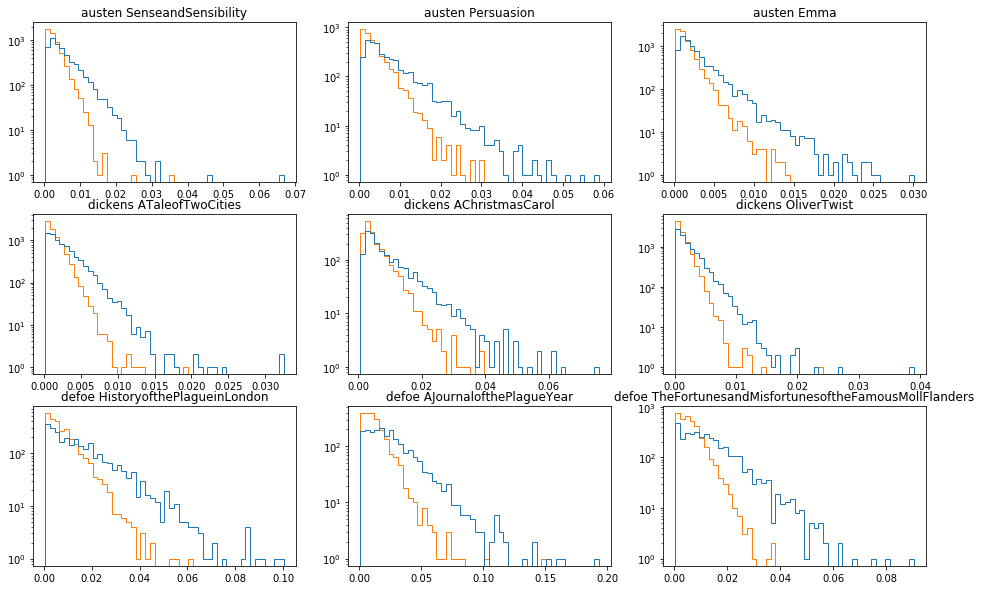

In [24]:
# plot the data
# make the figure
fig,ax = plt.subplots(3,3,figsize = (16,10),sharey=False)
for i, author in enumerate(eda_authlist):
    for j in range(len(book_dictloc[author])):
        ax[i,j].hist([nwords_wo_stopwords[i][j], nwords_w_stopwords[i][j]], bins = 50, histtype='step', label = ['Without Stopwords', 'With Stopwords'])
        ax[i,j].set_yscale('log')
        ax[i,j].set_title(str(author) + str(" ") + book_dictloc[author][j].title.split("\n")[0].replace(" ", ""))

In [ ]:
#Part of Speech Tagging Here

def get_pos_tags():
    
    


In [65]:
sentences1 = x.tokenize('sent', rem_stopwords = True)
sentences2 = x.tokenize('sent', rem_stopwords = False)
print (len(sentences1))
print (len(sentences2))

8076
8076


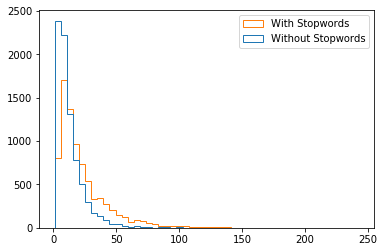

In [50]:
word_per_sent1 = []
word_per_sent2 = []

for token1, token2 in zip(sentences1, sentences2):
    word_per_sent1.append(len(nltk.word_tokenize(token1.lower())))
    word_per_sent2.append(len(nltk.word_tokenize(token2.lower())))

#print (word_per_sent[1:20])

plt.hist([word_per_sent1, word_per_sent2],  bins = 50, histtype='step', label = ['Without Stopwords', 'With Stopwords'])
plt.yscale("linear")
plt.legend(loc='upper right')
plt.show()

#print(np.where(np.array(word_per_sent) < 3))

In [40]:
location = np.array(np.where(np.array(word_per_sent) < 2)).flatten()
print(np.shape(location))

(1,)


In [41]:
for num in location:
    print (sentences2[num])

finis
